# 6. 작사가 인공지능 만들기

LSTM 모델과 셰익스피어 데이터셋을 사용해 간단한 작사가 인공지능을 만들어 본다.

<br>

# 6-1. 들어가며

### 목차

1. 시퀀스? 스퀀스!
2. I 다음 am을 쓰면 반 이상은 맞더라
3. 실습
    1. 데이터 다듬기
    2. 인공지능 학습시키기
    3. 잘 만들어졌는지 평가하기

4. 프로젝트 : 멋진 작사가 만들기

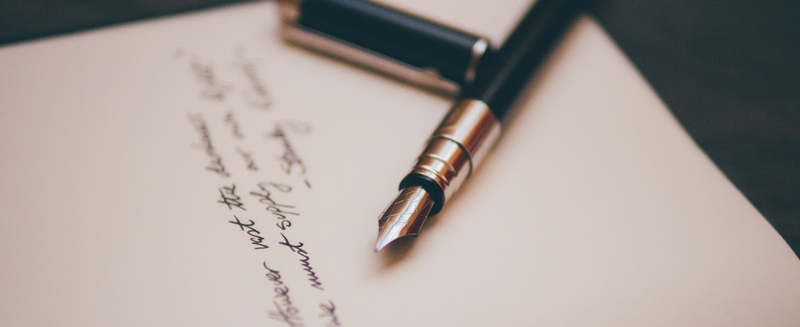

'문장'이란 것은 무엇일까요? 막상 떠올리려니 참 어렵지 않나요? 사전적 정의는 아래와 같습니다.

* 생각이나 감정을 말과 글로 표현할 때 완결된 내용을 나타내는 최소의 단위.

어떤 생각이나 감정을 말과 글로 표현하다... 멋지지만 인공지능에게 알려주기엔 조금 어려워 보입니다. 하지만 많은 인공지능들이 이미 놀라운 수준의 작문을 해내고 있다는 사실, 알고 계시나요? 처음 듣는 얘기라고요? 그렇다면 아래 웹사이트에서 현존하는 최고의 인공지능 작문가, GPT-2에게 작문을 시켜보세요! (현재는 GPT-3 모델도 발표되었습니다!)

- [https://talktotransformer.com/](https://talktotransformer.com/)

어떤가요? 아직 한국어 작문 실력은 조금 어색한 듯도 하군요. 아직 한국어 데이터를 충분히 학습한 것 같지는 않아 보입니다. 그러나 GPT-2가 처음 나왔을 때엔 세간에 충격적인 인상을 남겼습니다. 관련하여 다음과 같은 기사를 한 번쯤 보셨을지도 모르겠군요.

- [뛰어난 '문장 생성 인공지능'을 숨겨야만 하는 이유는?](https://decenter.kr/NewsView/1VFGQMBBXZ/GZ02)

GPT-2 이전에도 작문을 할 수 있는 딥러닝 모델은 존재했습니다. 그러나 생성한 문장 길이가 일정 이상이 되면 주제의 일관성이 흐트러지면서 어색함이 드러나곤 했습니다. 그러나 GPT-2는 무려 신문기사 1편 정도의 길이의 글을 작문하면서 주제나 논리의 일관성을 어느 정도 유지했다는 점에서 놀라움을 주었습니다.

2019년 2월, GPT-2를 발표한 OpenAI에서 문장 생성 모델의 오남용이 가져올 위험 때문에 해당 모델을 비공개하기로 하면서 위와 같은 기사들이 한동안 세간의 이슈가 된 바 있습니다. 그로부터 1년여 후 2020년 5월에 OpenAI에서는 다시 GPT-2를 이전보다 훨씬 큰 규모로 발전시킨 GPT-3를 발표해서 다시 한번 충격을 주었습니다. GPT-3가 만들어낸 텍스트는 그저 논리적 일관성을 유지하는 수준을 넘어서서 사람이 쓴 것과 구분이 안될 정도의 자연스러움을 보여 주었기 때문입니다.

왜 문장을 생성하는 인공지능이 이토록 충격을 주는 것일까요? 인공지능의 대명사라고 할 수 있는 알파고 같은 모델도 있지만, 일반인들이 흔히 `인공지능`이라고 할 때 흔히 떠올리는 것은 바로 인간과 자연어로 대화 가능한 인공지능이기 때문입니다. 언어능력이야 말로 인간을 다른 동물과 구분해 주는 독특한 능력 아닐까요? 만약 인공지능이 사람의 언어에서 생각과 의도와 감정을 읽어 내고, 그 의미를 이해하며, 적절한 말을 만들어내서 인간의 질문에 대답할 수 있다면 그야말로 `지능을 가진 기계`라는 특이점에 이르렀다고 할 수 있기 때문입니다.

이번 코스에서 우리는 인공지능이 문장을 이해하는 방식과 작문을 가르치는 법을 배울 겁니다. 코스를 성공적으로 마치고 나면 멋진 인공지능 작사가가 만들어져 있을 거고요! 부디 즐거운 시간이 되시길 바랍니다!

<br>

# 6-2. 시퀀스? 스퀀스!

**시퀀스(Sequence)** 라니? 시작부터 낯선 단어를 보여드려 죄송합니다. 하지만 우리는 이 시퀀스란 단어와 친해져야만 해요!

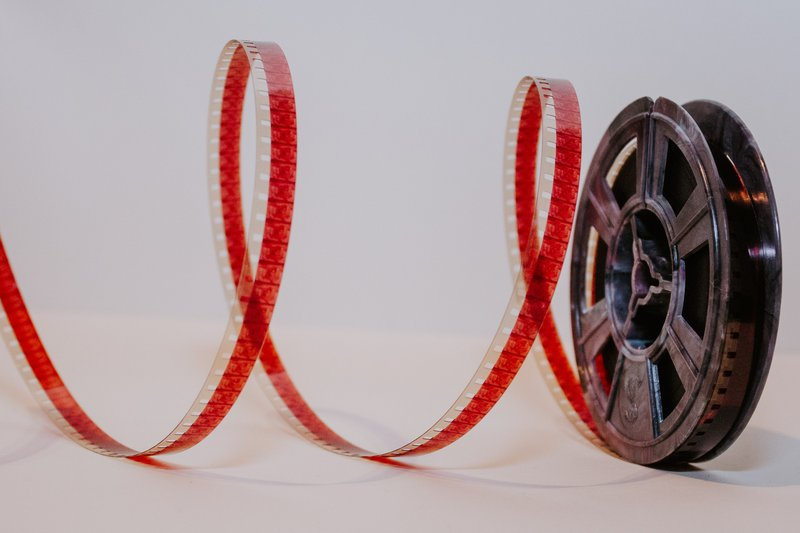

생각보다 시퀀스는 널리 사용되고 있습니다. 영화 분야에서도, 전기 분야에서도 쓰이죠. 게다가 학창 시절에 배운 수열을 영어로 시퀀스라고 한답니다!

문장은 당연하고, 주가, 날짜, 심지어 드라마까지... 아주 많은 유형이 시퀀스 데이터에 포함됩니다. 그리고 그 데이터들을 "Sequential" 하다고 표현하죠. 도대체 기준이 뭘까요? 아주 멋지게 잘 설명한 글이 아래에 준비되어 있습니다.

- [파이썬 프로그래밍 시퀀스 자료형](https://kukuta.tistory.com/310)

시퀀스 데이터가 곧 각 요소들의 연관성을 의미하는 것은 아니지만, 우리(인공지능)가 예측을 하려면 **어느 정도는 연관성이 있어줘야 합니다.** 예를 들어, `[ 18.01.01, 18.01.02, 18.01.03, ? ]` 의 "?" 부분을 맞추기 위해선 정답이 `18.01.04` 여야만 합니다. 정답이 "오리"라면 난감하다는 거죠!

문장을 구성하는 각 단어들은 문법이라는 규칙을 따라 배열되어 있죠. 다만 이 **문법**이란 놈이 괘씸하다는 것을 우리는 오랜 교육과정을 통해 배웠습니다. 그런 의미에서 문장이라는 시퀀스 데이터는 꽤나 어렵습니다. 이런 문법을 인공지능이 그대로 배워서 문장 데이터를 예측할 리가 만무하니, 좀 더 단순한 접근 방법을 취해야겠죠. 바로 **통계에 기반한 방법**입니다!

<br>

# 6-3. I 다음 am을 쓰면 반 이상은 맞더라

`나는 밥을 [ ]` 에서 빈칸에 들어갈 말이 `먹는다`라는 것을 우리는 큰 고민 없이 알 수 있습니다. `밥`은 통계적으로 `먹`히니까요. `알바생이 커피를 [ ]` 라면 아마도 `만든다`가 정답이겠죠. 알바생이 `커피`를 마실 수도 있지만, 통계적으론 `만드`니까요!

인공지능이 글을 이해하게 하는 방식도 위와 같습니다. 어떤 문법적인 원리를 통해서가 아니고, **수많은 글을 읽게 함으로써** `나는` , `밥을`, 그다음이 `먹는다` 라는 사실을 알게 하는 거죠. 그런 이유에서 **많은 데이터가 곧 좋은 결과**를 만들어냅니다. 단어를 적재적소에 활용하는 능력이 발달된다고 할까요?

이 방식을 가장 잘 처리하는 인공지능 중 하나가 **순환신경망(RNN)** 입니다. 이번 시간엔 자세한 내용보다는 간단한 구조를 중심으로 공부하겠습니다.

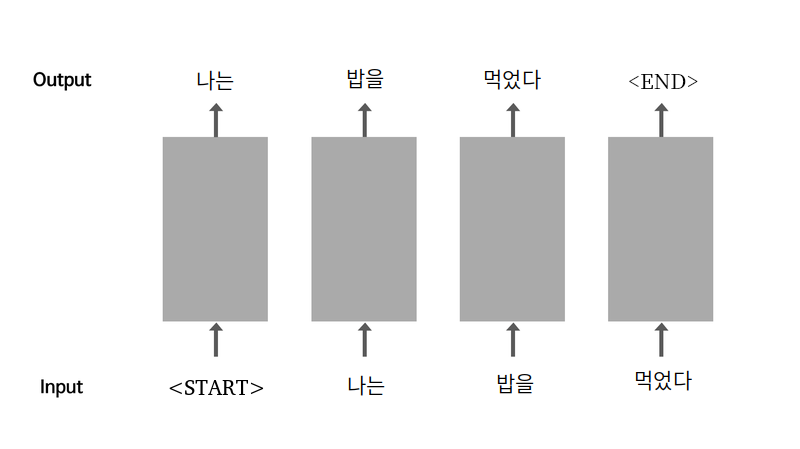

위는 순환신경망의 작동 방법을 가장 단순하게 표현한 예시입니다. 앞에서 `먹었다` 를 만드는 법은 배웠지만, 가장 첫 시작인 `나는` 은 어떻게 만들어야 할까요?

이는 `<start>` 라는 특수한 토큰을 맨 앞에 추가해 줌으로써 해결할 수 있습니다. 인공지능에게 "자, 이제 어떤 문장이든 생성해봐!" 라는 사인을 주는 셈인 거죠. `<start>` 를 입력으로 받은 순환신경망은 다음 단어로 `나는` 을 생성하고, **생성한 단어를 다시 입력으로 사용**합니다. 이 순환적인 특성을 살려 순환신경망이라고 이름을 붙인 것이죠!

그렇게 순차적으로 `밥을 먹었다` 까지 생성하고 나면, 인공지능은 "다 만들었어!" 라는 사인으로 `<end>` 라는 특수한 토큰을 생성합니다. 즉, 우리는 `<start>` 가 문장의 시작에 더해진 입력 데이터(문제지)와, `<end>` 가 문장의 끝에 더해진 출력 데이터(답안지)가 필요하며, 이는 **문장 데이터만 있으면 만들어낼 수 있다**는 것 또한 알 수 있습니다.

위 과정을 **파이썬**으로는 아래와 같이 작성합니다.

In [1]:
sentence = " 나는 밥을 먹었다 "
# <start>는 문장의 시작 입니다. 
# <start> 토큰을 받은 순환 신경망은 "나는"을 출력한다.
# 출력된 "나는"이라는 단어를 다시 입력으로 사용하고 이러한 반복을 통해 "먹었다"까지 
# 글을 생성한다. 마지막으로 끝(완성)을 뜻하는 <end> 토큰을 생성하여 마무리 합니다. 
source_sentence = "<start>" + sentence
target_sentence = sentence + "<end>"

print("Source 문장:", source_sentence)
# Source 문장: <start> 나는 밥을 먹었다
print("Target 문장:", target_sentence)
# Target 문장:  나는 밥을 먹었다 <end>

Source 문장: <start> 나는 밥을 먹었다 
Target 문장:  나는 밥을 먹었다 <end>


### 언어 모델 (Language Model)

`나는`, `밥을`, `먹었다` 를 순차적으로 생성할 때, `밥을` 다음이 `먹었다` 인 것은 쉽게 알 수 있습니다. 하지만 `나는` 다음이 `밥을` 인 것은 조금 억지처럼 느껴질 수 있습니다. 실제로 동작하는 방식도, `밥을` 을 만드는 것은 순전히 운입니다. 우리가 의도한다고 나오는 것이 아니죠.

이걸 좀 더 확률적으로 표현해 보겠습니다.

'나는, 밥을' 다음에 '먹었다' 가 나올 확률을 $\mathrm{P}(먹었다 | 나는, 밥을)$ 이라고 합시다. 그렇다면 이 확률은 '나는' 뒤에 '밥이' 가 나올 확률인 $\mathrm{P}(밥을 | 나는)$ 보다는 높게 나올 것입니다. 아마 $\mathrm{P}(먹었다 | 나는, 밥을, 맛있게)$ 의 확률값은 더 높아지겠죠?

어떤 문구 뒤에 다음 단어가 나올 확률이 높다는 것은 그 단어가 나오는 것이 보다 자연스럽다는 뜻이 됩니다. 그렇다면 '나는' 뒤에 '밥을'이 나오는 것이 자연스럽지 않다는 뜻일까요? 그것은 아닙니다. '나는' 뒤에 올 수 있는 자연스러운 단어의 경우의 수가 워낙 많다 보니 불확실성이 높을 뿐입니다.

$n-1$개의 단어 시퀀스 $w_1,\ ...,\ w_{n-1}$가 주어졌을때 $n$번째 단어 $w_n$으로 무엇이 올지를 예측하는 확률 모델을 **언어 모델(Language Model)** 이라고 부릅니다. 파라미터 $\theta$로 모델링 하는 언어 모델을 다음과 같이 표현할 수 있습니다.

$$
\mathrm{P}(w_n|w_1,\ ...,\ w_{n-1};\theta)
$$

잠깐 스크롤을 올려 RNN의 개념도를 잠깐 다시 보시면, 정확히 $w_1,\ ...,\ w_{n-1}$가 주어졌을 때, $n$번째 단어 $w_n$으로 무엇이 올지 예측하는 구조를 가지고 있음을 알아챌 수 있으실 겁니다. 이런 언어 모델을 어떻게 학습시킬 수 있을까요?

간단합니다. 어떤 텍스트도 언어 모델의 학습 데이터가 될 수 있습니다. $n-1$번째까지의 단어 시퀀스가 x_train이 되고 $n$번째 단어가 y_train이 되는 데이터셋은 무궁무진하게 만들 수 있으니까요.

이렇게 학습된 언어 모델을 학습 모드가 아닌 테스트 모드로 가동하면 어떤 일이 벌어질까요? 네, 이 모델은 일정한 단어 시퀀스가 주어진다면 다음 단어, 그 다음 단어를 계속해서 예측해 낼 것입니다. 이게 바로 텍스트 생성이고 작문 아니겠습니까? **잘 학습된 언어 모델은 훌륭한 문장 생성기**로 동작하게 됩니다.

이전 스텝에서 소개했던 GPT-2 같은 문장 생성기도 언어 모델의 한 종류에 불과합니다. 딥러닝 모델의 구조나 파라미터 사이즈, 학습 데이터의 양 등이 특별할 뿐, 기본적인 원리는 오늘 우리가 만들게 될 언어 모델과 전혀 다를 게 없습니다.

<br>

# 6-4. 실습 (1) 데이터 다듬기

지금부터는 실습을 해볼 겁니다. 이번 실습에서는 연극의 대사를 학습해서 스스로 연극 대사 문장을 생성해내는 언어 모델 인공지능을 만들 겁니다. 시작하죠!

### 데이터 다운로드

그럼 첫 번째 단계는 무엇일까요? 인공지능의 시작은 언제나 그렇듯 데이터입니다.

클라우드 환경에서는 데이터를 준비해두었으니 `Cloud shell`에서 아래 명령어를 입력해 연결만 시켜주세요.

```sh
mkdir -p ~/aiffel/lyricist/models
# mkdir : make directory의 약자로서 디렉토리를 생성할 때 사용하는 명령어입니다.
# -p : 상위 경로도 함께 생성 models 폴더를 생성할때 lyricist 폴더가 없으면 해당옵션이 없을시 에러발생

ln -s ~/data ~/aiffel/lyricist/data
# ln : Link 의 약자로서 리눅스 파일시스템에서 링크파일을 만드는 명령어입니다.
# -s : 심볼릭링크(단순히 원본파일을 가리키도록 링크만 시켜둔 것으로 MS의 윈도우시스템에서 흔히 사용하는 '바로가기' 같은 것)를 생성하라는 옵션
```

준비된 데이터는 1Mb 남짓한 텍스트 파일입니다. GPT-2를 학습시킬 때의 100Gb 가까이 되는 수준과는 아주 거리가 멉니다만, 멋진 셰익스피어 같은 극작가 언어 모델이 탄생하길 기대해 봅니다.

우선 실습에 사용할 라이브러리를 불러와 주세요. 그리고 방금 준비한 파일의 내용을 확인해 봅시다.

In [2]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# re: Regular Expression의 줄임말로, 파이썬 정규표현식을 사용하기 위한 모듈
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# tensorflow(TensorFlow): 데이터 흐름 프로그래밍을 위한 라이브러리. 데이터 그래프를 수치적으로 연산하기 위해 구글에서 만든 오픈 소스 라이브러리.
import os, re 
import numpy as np
import tensorflow as tf

# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 파일을 읽기모드로 열고
# 라인 단위로 끊어서 list 형태로 읽어옵니다.
file_path = os.getenv('HOME') + '/aiffel/Exploration-6/lyricist/data/shakespeare.txt'
with open(file_path, "r") as f:
    raw_corpus = f.read().splitlines()

# 앞에서부터 10라인만 화면에 출력해 볼까요?
print(raw_corpus[:9])

['First Citizen:', 'Before we proceed any further, hear me speak.', '', 'All:', 'Speak, speak.', '', 'First Citizen:', 'You are all resolved rather to die than to famish?', '']


경로를 따라 데이터를 읽어오면 데이터가 어떻게 생겼는지 눈으로 확인할 수 있습니다. 완벽한 연극 대본이군요! 하지만 우린 **문장(대사)** 만을 원하므로 화자 이름이나 공백뿐인 정보는 필요가 없습니다. 우리가 만들 언어 모델은 연극 대사를 만들어 내는 모델이거든요.

1차 필터링을 할 필요가 있겠습니다. 데이터의 형태를 자세히 살피며 필터를 구상해보죠.

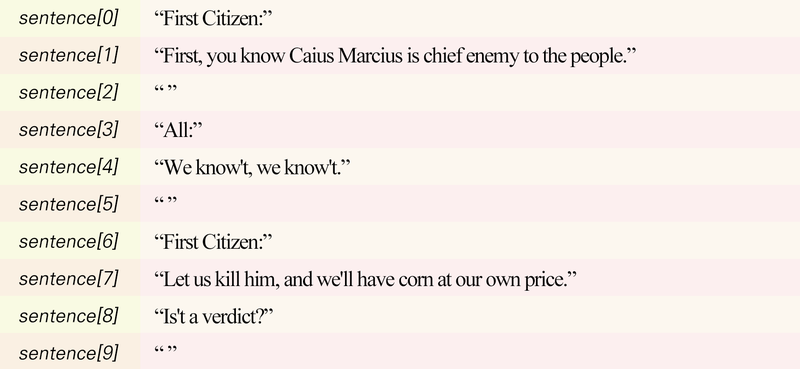

모든 문장을 하나하나 검사한다고 가정합시다. 우리가 원치 않는 문장은 **화자가 표기된 문장(0, 3, 6)**, 그리고 **공백인 문장(2, 5, 9)** 입니다. 화자가 표기된 문장은 문장의 끝이 `:` 로 끝나게 되어 있죠. 일반적으로 대사가 `:` 로 끝나는 일은 없을테니, `:` 를 기준으로 문장을 제외해도 괜찮을 것 같습니다. 그리고 공백인 문장은 길이를 검사하여 길이가 0이라면 제외를 시키죠!

In [3]:
# enumerate() 함수를 이용하여 raw_corpus list 내에 저장된 문장과 그 문장의 인덱스를 반환 (인덱스, 문장 순)
for idx, sentence in enumerate(raw_corpus):
    if len(sentence) == 0: continue   # 길이가 0인 문장은 건너뜁니다.
    if sentence[-1] == ":": continue  # 문장의 끝이 : 인 문장은 건너뜁니다.

    if idx > 9: break   # 일단 문장 10개만 확인해 볼 겁니다.
        
    print(sentence)

Before we proceed any further, hear me speak.
Speak, speak.
You are all resolved rather to die than to famish?


우리가 원하는 문장만 성공적으로 출력됩니다.

텍스트 분류 모델에서 많이 보신 것처럼 텍스트 생성 모델에도 단어 사전을 만들게 됩니다. 그렇다면 문장을 일정한 기준으로 쪼개야겠죠? 그 과정을 **토큰화(Tokenize)** 라고 합니다.

가장 심플한 방법은 띄어쓰기를 기준으로 나누는 방법이고, 우리도 그 방법을 사용할 겁니다. 하지만 약간의 문제가 있을 수 있죠. 몇 가지 문제 케이스를 살펴보죠.

1. Hi, my name is John. *("Hi," "my", ..., "john." 으로 분리됨) - 문장부호
2. First, open the first chapter. *(First와 first를 다른 단어로 인식) - 대소문자
3. He is a ten-year-old boy. *(ten-year-old를 한 단어로 인식) - 특수문자

"1." 을 막기 위해 **문장 부호 양쪽에 공백을 추가** 할 거고요, "2." 를 막기 위해 **모든 문자들을 소문자로 변환** 할 겁니다. "3."을 막기 위해 **특수문자들은 모두 제거** 하도록 하죠!

이런 전처리를 위해 정규표현식(Regex)을 이용한 필터링이 유용하게 사용됩니다.

In [4]:
# 입력된 문장을
#     1. 소문자로 바꾸고, 양쪽 공백을 지웁니다
#     2. 특수문자 양쪽에 공백을 넣고
#     3. 여러개의 공백은 하나의 공백으로 바꿉니다
#     4. a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꿉니다
#     5. 다시 양쪽 공백을 지웁니다
#     6. 문장 시작에는 <start>, 끝에는 <end>를 추가합니다
# 이 순서로 처리해주면 문제가 되는 상황을 방지할 수 있겠네요!
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

In [5]:
# 이 문장이 어떻게 필터링되는지 확인해 보세요.
print(preprocess_sentence("   This @_is ;;;sample        sentence.    "))

<start> this is sample sentence . <end>


In [6]:
test_sentence = "   This @_is ;;;sample        sentence.    "
print(test_sentence)

test_sentence = test_sentence.lower().strip() # 1
print(test_sentence)

test_sentence = re.sub(r"([?.!,¿])", r" \1 ", test_sentence) # 2
print(test_sentence)

test_sentence = re.sub(r'[" "]+', " ", test_sentence) # 3
print(test_sentence)

test_sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", test_sentence) # 4
print(test_sentence)

test_sentence = test_sentence.strip() # 5
print(test_sentence)

test_sentence = '<start> ' + test_sentence + ' <end>' # 6
print(test_sentence)

   This @_is ;;;sample        sentence.    
this @_is ;;;sample        sentence.
this @_is ;;;sample        sentence . 
this @_is ;;;sample sentence . 
this is sample sentence . 
this is sample sentence .
<start> this is sample sentence . <end>


짜잔, 지저분한 문장을 넣어도 예쁘게 변환해 주는 정제 함수가 완성되었습니다! 보너스로 이전 스텝에서 배운 `<start>` `<end>` 도 추가했습니다.

그러면 우리가 구축해야 할 데이터셋은 어떤 모양이 될까요?

이전 스텝에서 봤던 예를 떠올려 봅시다.

```
언어 모델의 입력 문장 :  <start> 나는 밥을 먹었다
언어 모델의 출력 문장 : 나는 밥을 먹었다 <end>
```

자연어처리 분야에서 모델의 입력이 되는 문장을 **소스 문장(Source Sentence)** , 정답 역할을 하게 될 모델의 출력 문장을 **타겟 문장(Target Sentence)** 라고 관례적으로 부릅니다. 각각 X_train, y_train 에 해당한다고 할 수 있겠죠?

그렇다면 우리는 위에서 만든 정제 함수를 통해 만든 데이터셋에서 토큰화를 진행한 후 끝 단어 `<end>`를 없애면 소스 문장, 첫 단어 `<start>`를 없애면 타겟 문장이 되겠죠? 이 정제 함수를 활용해서 아래와 같이 정제 데이터를 구축합니다!

In [7]:
# 여기에 정제된 문장을 모을겁니다
corpus = []

# raw_corpus list에 저장된 문장들을 순서대로 반환하여 sentence에 저장
for sentence in raw_corpus:
    # 우리가 원하지 않는 문장은 건너뜁니다
    if len(sentence) == 0: continue
    if sentence[-1] == ":": continue
    
    # 앞서 구현한 preprocess_sentence() 함수를 이용하여 문장을 정제를 하고 담아주세요
    preprocessed_sentence = preprocess_sentence(sentence)
    corpus.append(preprocessed_sentence)
        
# 정제된 결과를 10개만 확인해보죠
corpus[:10]

['<start> before we proceed any further , hear me speak . <end>',
 '<start> speak , speak . <end>',
 '<start> you are all resolved rather to die than to famish ? <end>',
 '<start> resolved . resolved . <end>',
 '<start> first , you know caius marcius is chief enemy to the people . <end>',
 '<start> we know t , we know t . <end>',
 '<start> let us kill him , and we ll have corn at our own price . <end>',
 '<start> is t a verdict ? <end>',
 '<start> no more talking on t let it be done away , away ! <end>',
 '<start> one word , good citizens . <end>']

이제 데이터는 완벽하게 준비가 된 것 같네요!

자, 새로운 언어를 배우는 상상을 해봅시다. 영어를 전혀 모르던 그 때로 돌아가서, 다시 영어를 배우려면 어떻게 해야 할까요? **영한사전** 을 허리춤에 끼고 문장 속 단어를 하나하나 찾아가며 **한국어 해석** 을 적겠죠? 이 아이디어는 인공지능에게도 똑같이 적용됩니다. **배우고자 하는 언어** 를 **모국어로 표현** 을 해야 공부를 할 수 있어요.

인공지능의 모국어라면 단연 **숫자** 겠죠. 우리는 가르칠 언어(데이터)를 숫자로 변환해서 인공지능에게 줄 겁니다. 이에 필요한 것은 **사전** ! 굳이 명명하자면... 데숫사전...?

텐서플로우는 자연어 처리를 위한 여러 가지 모듈을 제공하는데, 우리도 그 모듈을 십분 활용할 겁니다! 아래에서 활용하게 될 `tf.keras.preprocessing.text.Tokenizer` 패키지는 정제된 데이터를 토큰화하고, 단어 사전(vocabulary 또는 dictionary라고 칭함)을 만들어주며, 데이터를 숫자로 변환까지 한 방에 해줍니다. 이 과정을 **벡터화(vectorize)** 라 하며, 숫자로 변환된 데이터를 **텐서(tensor)** 라고 칭합니다. 우리가 사용하는 텐서플로우로 만든 모델의 입출력 데이터는 실제로는 모두 이런 텐서로 변환되어 처리되는 것입니다.

In [8]:
# 토큰화 할 때 텐서플로우의 Tokenizer와 pad_sequences를 사용합니다
# 더 잘 알기 위해 아래 문서들을 참고하면 좋습니다
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
def tokenize(corpus):
    # 7000단어를 기억할 수 있는 tokenizer를 만들겁니다
    # 우리는 이미 문장을 정제했으니 filters가 필요없어요
    # 7000단어에 포함되지 못한 단어는 '<unk>'로 바꿀거에요
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=7000, 
        filters=' ',
        oov_token="<unk>"
    )
    
    # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
    # tokenizer.fit_on_texts(texts): 문자 데이터를 입력받아 리스트의 형태로 변환하는 메서드
    tokenizer.fit_on_texts(corpus)
    
    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    # tokenizer.texts_to_sequences(texts): 텍스트 안의 단어들을 숫자의 시퀀스 형태로 변환하는 메서드
    tensor = tokenizer.texts_to_sequences(corpus)
    
    # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
    # 만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
    # 문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2  143   40 ...    0    0    0]
 [   2  110    4 ...    0    0    0]
 [   2   11   50 ...    0    0    0]
 ...
 [   2  149 4553 ...    0    0    0]
 [   2   34   71 ...    0    0    0]
 [   2  945   34 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f8f713bbe80>


생성된 텐서 데이터를 3번째 행, 10번째 열까지만 출력해 봅시다.

In [9]:
print(tensor[:3, :10])
print(tensor.shape)

[[   2  143   40  933  140  591    4  124   24  110]
 [   2  110    4  110    5    3    0    0    0    0]
 [   2   11   50   43 1201  316    9  201   74    9]]
(24015, 21)


텐서 데이터는 모두 정수로 이루어져 있습니다. 이 숫자는 다름 아니라, tokenizer에 구축된 단어 사전의 인덱스입니다. 단어 사전이 어떻게 구축되었는지 아래와 같이 확인해 봅시다.

In [10]:
# tokenizer.index_word: 현재 계산된 단어의 인덱스와 인덱스에 해당하는 단어를 dictionary 형태로 반환 (Ex. {index: '~~', index: '~~', ...})
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : ,
5 : .
6 : the
7 : and
8 : i
9 : to
10 : of


어떻습니까? 2번 인덱스가 바로 `<start>`였습니다. 왜 모든 행이 2로 시작하는지 이해할 수 있겠습니다.

이제 생성된 텐서를 소스와 타겟으로 분리하여 모델이 학습할 수 있게 하겠습니다. 이 과정도 텐서플로우가 제공하는 모듈을 사용할 것이니, 어떻게 사용하는지만 눈여겨 봐둡시다.

텐서 출력부에서 행 뒤쪽에 0이 많이 나온 부분은 정해진 입력 시퀀스 길이보다 문장이 짧을 경우 0으로 패딩(padding)을 채워 넣은 것입니다. 사전에는 없지만 0은 바로 패딩 문자 `<pad>`가 될 것입니다.

In [11]:
# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor[:, :-1]  
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[  2 143  40 933 140 591   4 124  24 110   5   3   0   0   0   0   0   0
   0   0]
[143  40 933 140 591   4 124  24 110   5   3   0   0   0   0   0   0   0
   0   0]


corpus 내의 첫 번째 문장에 대해 생성된 소스와 타겟 문장을 확인해 보았습니다. 예상대로 소스는 2(`<start>`)에서 시작해서 3(`<end>`)으로 끝난 후 0(`<pad>`)로 채워져 있습니다. 하지만 타겟은 2로 시작하지 않고 소스를 왼쪽으로 한 칸 시프트 한 형태를 가지고 있습니다.

마지막으로 우리는 데이터셋 객체를 생성할 것입니다. 그동안 우리는 model.fit(x_train, y_train, ...) 형태로 Numpy Array 데이터셋을 생성하여 model에 제공하는 형태의 학습을 많이 진행해 왔습니다. 그러나 텐서플로우를 활용할 경우 텐서로 생성된 데이터를 이용해 `tf.data.Dataset`객체를 생성하는 방법을 흔히 사용합니다.

`tf.data.Dataset`객체는 텐서플로우에서 사용할 경우 데이터 입력 파이프라인을 통한 속도 개선 및 각종 편의 기능을 제공하므로 꼭 사용법을 알아 두시기를 권합니다. 우리는 이미 데이터셋을 텐서 형태로 생성해 두었으므로, `tf.data.Dataset.from_tensor_slices()` 메소드를 이용해 `tf.data.Dataset`객체를 생성할 것입니다.

In [12]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

# tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0:<pad>를 포함하여 7001개
# tokenizer.num_words: 주어진 데이터의 문장들에서 빈도수가 높은 n개의 단어만 선택
# tokenize() 함수에서 num_words를 7000개로 선언했기 때문에, tokenizer.num_words의 값은 7000
VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
# 데이터셋에 대해서는 아래 문서를 참고하세요
# 자세히 알아둘수록 도움이 많이 되는 중요한 문서입니다
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((256, 20), (256, 20)), types: (tf.int32, tf.int32)>

이번 스텝에서 데이터셋을 생성하기 위해 거쳐 온 과정을 잘 기억해 두시길 바랍니다.

- 정규표현식을 이용한 corpus 생성
- `tf.keras.preprocessing.text.Tokenizer`를 이용해 corpus를 텐서로 변환
- `tf.data.Dataset.from_tensor_slices()`를 이용해 corpus 텐서를 `tf.data.Dataset`객체로 변환

`dataset`을 얻음으로써 데이터 다듬기 과정은 끝났습니다. tf.data.Dataset에서 제공하는 `shuffle()`, `batch()` 등 다양한 데이터셋 관련 기능을 손쉽게 이용할 수 있게 되었군요.

이 모든 일련의 과정을 텐서플로우에서의 **데이터 전처리** 라 칭합니다!

<br>

# 6-5. 실습 (2) 인공지능 학습시키기

우리가 만들 모델의 구조도는 아래와 같습니다.

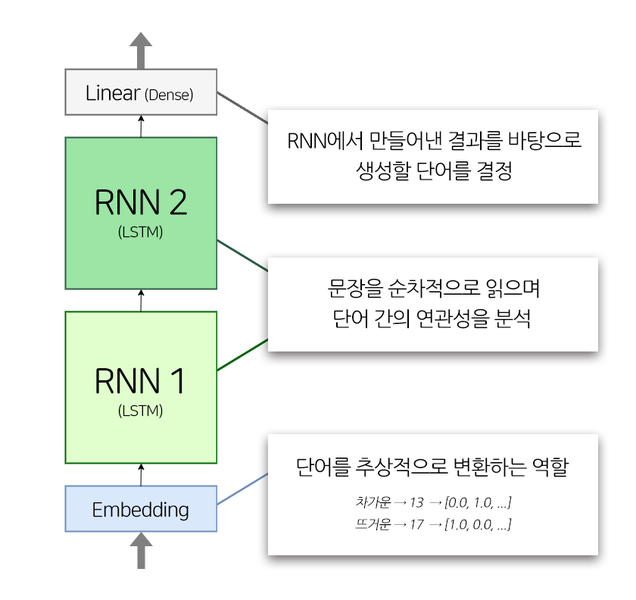

우리가 만들 모델은 tf.keras.Model을 Subclassing하는 방식으로 만들 것입니다. 위 그림에서 설명한 것처럼 우리가 만들 모델에는 1개의 Embedding 레이어, 2개의 LSTM 레이어, 1개의 Dense 레이어로 구성되어 있습니다.

각 레이어의 기능을 확실히 이해하는 것은 나중에 하고, 지금은 구조도에 설명된 정도의 간단한 이해만 가지고 갑시다.

In [13]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        # Embedding 레이어, 2개의 LSTM 레이어, 1개의 Dense 레이어로 구성되어 있다.
        # Embedding 레이어는 단어 사전의 인덱스 값을 해당 인덱스 번째의 워드 벡터로 바꿔준다.
        # 이 워드 벡터는 의미 벡터 공간에서 단어의 추상적 표현으로 사용된다. 
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size) 
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)  
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
# embedding size 값이 커질수록 단어의 추상적인 특징들을 더 잡아낼 수 있지만
# 그만큼 충분한 데이터가 없으면 안좋은 결과 값을 가져옵니다!   
embedding_size = 256 # 워드 벡터의 차원수를 말하며 단어가 추상적으로 표현되는 크기입니다.
hidden_size = 1024 # 모델에 얼마나 많은 일꾼을 둘 것인가? 정도로 이해하면 좋다.
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size) # tokenizer.num_words에 +1인 이유는 문장에 없는 pad가 사용되었기 때문이다.

텍스트 분류 모델을 다루어 보셨다면 Embedding 레이어의 역할에 대해서는 낯설지 않을 것입니다. 우리 입력 텐서에는 단어 사전의 인덱스가 들어 있습니다. Embedding 레이어는 이 인덱스 값을 해당 인덱스 번째의 워드 벡터로 바꿔 줍니다. 이 워드 벡터는 의미 벡터 공간에서 단어의 추상적 표현(representation)으로 사용됩니다.

위 코드에서 `embedding_size` 는 워드 벡터의 차원수, 즉 단어가 추상적으로 표현되는 크기입니다. 만약 그 크기가 2라면 예를 들어

- 차갑다: [0.0, 1.0]
- 뜨겁다: [1.0, 0.0]
- 미지근하다: [0.5, 0.5]

정도의 구분이 가능하겠군요. 값이 커질수록 단어의 추상적인 특징들을 더 잡아낼 수 있지만, 그만큼 충분한 데이터가 주어지지 않으면 **오히려 혼란만을 야기**할 수 있습니다. 이번 실습에서는 256이 적당해 보이네요.

LSTM 레이어의 hidden state 의 차원수인 `hidden_size` 도 같은 맥락입니다. `hidden_size` 는 모델에 얼마나 많은 일꾼을 둘 것인가? 로 이해해도 크게 엇나가지 않습니다. 그 일꾼들은 모두 같은 데이터를 보고 각자의 생각을 가지는데, 역시 충분한 데이터가 주어지면 올바른 결정을 내리겠지만 그렇지 않으면 **배가 산으로 갈 뿐** 입니다. 이번 실습에는 `1024`가 적당해보이는군요.

---

우리의 model은 아직 제대로 build되지 않았습니다. model.compile()을 호출한 적도 없고, 아직 model의 입력 텐서가 무엇인지 제대로 지정해 주지도 않았기 때문입니다.

그런 경우 아래와 같이 model에 데이터를 아주 조금 태워 보는 것도 방법입니다. model의 input shape가 결정되면서 model.build()가 자동으로 호출됩니다.

In [14]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model(src_sample)

<tf.Tensor: shape=(256, 20, 7001), dtype=float32, numpy=
array([[[-1.98673108e-04,  3.59432830e-04,  2.58490581e-06, ...,
          2.54680403e-04,  2.85866670e-04,  2.23433344e-05],
        [-3.64531530e-04,  3.71571950e-04,  1.04129758e-04, ...,
          2.00073278e-04,  6.12621778e-04,  1.96772802e-04],
        [-5.96738188e-04, -1.46234102e-04,  3.22085034e-05, ...,
         -1.51926739e-04,  5.54285711e-04,  4.14327835e-04],
        ...,
        [ 2.40149326e-04, -1.23106467e-03,  8.17009597e-04, ...,
          2.50157726e-04,  1.70955132e-03,  1.12292386e-04],
        [-1.63288816e-04, -1.13766547e-03,  3.70482448e-04, ...,
          1.22155616e-04,  2.36067758e-03,  2.03117117e-04],
        [-5.63324604e-04, -1.04475254e-03, -7.27127190e-05, ...,
         -1.02927606e-05,  2.99748522e-03,  2.92523066e-04]],

       [[-1.98673108e-04,  3.59432830e-04,  2.58490581e-06, ...,
          2.54680403e-04,  2.85866670e-04,  2.23433344e-05],
        [-3.01661843e-04,  6.43969630e-04, -1.

모델의 최종 출력 텐서 shape를 유심히 보면 `shape=(256, 20, 7001)`임을 알 수 있습니다. 7001은 Dense 레이어의 출력 차원수입니다. 7001개의 단어 중 어느 단어의 확률이 가장 높을지를 모델링해야 하기 때문입니다. 256은 이전 스텝에서 지정한 배치 사이즈입니다. `dataset.take(1)`를 통해서 1개의 배치, 즉 256개의 문장 데이터를 가져온 것입니다.

그렇다면 20은 무엇을 의미할까요? 비밀은 바로 `tf.keras.layers.LSTM(hidden_size, return_sequences=True)`로 호출한 LSTM 레이어에서 `return_sequences=True`이라고 지정한 부분에 있습니다. 즉, LSTM은 자신에게 입력된 시퀀스의 길이만큼 동일한 길이의 시퀀스를 출력한다는 의미입니다. 만약 `return_sequences=False`였다면 LSTM 레이어는 1개의 벡터만 출력했을 것입니다.

그런데 문제는, 우리의 모델은 입력 데이터의 시퀀스 길이가 얼마인지 모른다는 점입니다. 모델을 만들면서 알려준 적도 없습니다. 그럼 20은 언제 알게된 것일까요? 네, 그렇습니다. 데이터를 입력받으면서 비로소 알게 된 것입니다. 우리 데이터셋의 max_len이 20으로 맞춰져 있었던 것입니다.

In [15]:
# 모델의 구조를 확인합니다.
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  1792256   
_________________________________________________________________
lstm (LSTM)                  multiple                  5246976   
_________________________________________________________________
lstm_1 (LSTM)                multiple                  8392704   
_________________________________________________________________
dense (Dense)                multiple                  7176025   
Total params: 22,607,961
Trainable params: 22,607,961
Non-trainable params: 0
_________________________________________________________________


제 드디어 `model.summary()`를 호출할 수 있게 되었습니다. 그런데 호출해 보니 그동안 많이 보았던 것과는 다른 점이 있습니다. 우리가 궁금했던 Output Shape를 정확하게 알려주지 않습니다. 바로 위에서 설명한 이유 때문입니다. 우리의 모델은 입력 시퀀스의 길이를 모르기 때문에 Output Shape를 특정할 수 없는 것입니다.

하지만 모델의 파라미터 사이즈는 측정됩니다. 대략 22million 정도 되는군요. 참고로 서두에 소개했던 GPT-2의 파라미터 사이즈는, 1.5billion입니다. 우리 모델의 100배까지는 안되더라도 수십배가 넘는군요. 놀라지 마세요. GPT-3의 파라미터 사이즈는 GPT-2의 100배니까요.

---

이제 모델이 학습할 준비가 완료되었습니다. 아래 코드를 실행해 모델을 학습시켜보세요!

In [16]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
# optimizer와 loss등은 차차 배웁니다
# 혹시 미리 알고 싶다면 아래 문서를 참고하세요
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# 양이 상당히 많은 편이니 지금 보는 것은 추천하지 않습니다

# Adam 알고리즘을 구현하는 optimzier이며 어떤 optimzier를 써야할지 모른다면 Adam을 쓰는 것도 방법이다.
# 우리가 학습을 할 때 최대한 틀리지 않는 방향으로 학습을 해야한다.
# 여기서 얼마나 틀리는지(loss)를 알게하는 함수가 손실함수 이다.
# 이 손실함수의 최소값을 찾는 것을 학습의 목표로 하며 여기서 최소값을 찾아가는 과정을 optimization 이라하고
# 이를 수행하는 알고리즘을 optimizer(최적화)라고 한다.

optimizer = tf.keras.optimizers.Adam() # Adam은 현재 가장 많이 사용하는 옵티마이저이다. 자세한 내용은 차차 배운다.
loss = tf.keras.losses.SparseCategoricalCrossentropy( # 훈련 데이터의 라벨이 정수의 형태로 제공될 때 사용하는 손실함수이다.
    from_logits=True, # 기본값은 False이다. 모델에 의해 생성된 출력 값이 정규화되지 않았음을 손실 함수에 알려준다. 즉 softmax함수가 적용되지 않았다는걸 의미한다. 
    reduction='none'  # 기본값은 SUM이다. 각자 나오는 값의 반환 원할 때 None을 사용한다.
)
# 모델을 학습시키키 위한 학습과정을 설정하는 단계이다.
model.compile(loss=loss, optimizer=optimizer) # 손실함수와 훈련과정을 설정했다.
model.fit(dataset, epochs=30) # 만들어둔 데이터셋으로 모델을 학습한다. 30번 학습을 반복하겠다는 의미다.a

Epoch 1/30
93/93 [==============================] - 22s 181ms/step - loss: 3.4717
Epoch 2/30
93/93 [==============================] - 17s 187ms/step - loss: 2.7972
Epoch 3/30
93/93 [==============================] - 17s 188ms/step - loss: 2.6943
Epoch 4/30
93/93 [==============================] - 17s 183ms/step - loss: 2.5977
Epoch 5/30
93/93 [==============================] - 17s 183ms/step - loss: 2.5330
Epoch 6/30
93/93 [==============================] - 17s 185ms/step - loss: 2.4791
Epoch 7/30
93/93 [==============================] - 17s 184ms/step - loss: 2.4183
Epoch 8/30
93/93 [==============================] - 17s 183ms/step - loss: 2.3630
Epoch 9/30
93/93 [==============================] - 17s 183ms/step - loss: 2.3129
Epoch 10/30
93/93 [==============================] - 17s 184ms/step - loss: 2.2635
Epoch 11/30
93/93 [==============================] - 17s 183ms/step - loss: 2.2158
Epoch 12/30
93/93 [==============================] - 17s 183ms/step - loss: 2.1699
Epoch 13/30
9

Loss는 모델이 오답을 만들고 있는 정도라고 생각하셔도 좋습니다(그렇다고 Loss가 1일 때 99%를 맞추고 있다는 의미는 아닙니다). 오답률이 감소하고 있으니 **학습이 잘 진행되고 있다** 고 해석할 수 있죠!

학습이 완료되었다면 이제 모델을 평가해 봅시다.

<br>

# 6-6. 실습 (3) 잘 만들어졌는지 평가하기

모델이 작문을 잘하는지 컴퓨터 알고리즘이 평가하는 것은 무리가 있습니다. 만약에 그게 가능했다면 우리가 지금껏 해온 독후감 숙제를 컴퓨터가 채점했겠죠? 우선 작문을 잘했다는 기준마저도 사람마다 다릅니다. 그래서 작문을 잘했는지를 정량적으로 측정할 이론 조차도 없습니다. 그래서 작문을 잘 했는지 컴퓨터가 판단할 방법을 만들 수도 없죠.

만약 작문이 아닌 요약, 문제 풀이, 번역처럼 비교적 정량적으로 측정할 대상이 있는 경우라면 조금 가능할 지도 모릅니다. 그래서 BLEU나 ROUGE 등의 평가 방법이 제안되고 많이 이용됩니다. 대체로 자연어 처리에서 결과를 평가할 때는 어떤 단어가 포함 되었는지를 바탕으로 측정하는데요. 요약이나 문제풀이, 번역과 같은 작업에는 핵심 단어가 포함되었는지만 측정해도 어느 정도 정량적인 평가가 되기 때문에 가능한 것이죠. 이번에 사용하지는 않지만 자연어 처리에서는 많이 사용되는 평가 방법이니 이름은 익혀두세요.

이번처럼 작문 모델을 평가하는 가장 확실한 방법은 **작문을 시켜보고 사람이 평가**하는 겁니다.

아래 `generate_text` 함수는 모델에게 시작 문장을 전달하면 모델이 시작 문장을 바탕으로 작문을 진행하게 합니다.

In [18]:
#문장생성 함수 정의
#모델에게 시작 문장을 전달하면 모델이 시작 문장을 바탕으로 작문을 진행
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20): #시작 문자열을 init_sentence 로 받으며 디폴트값은 <start> 를 받는다
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence]) #텍스트 안의 단어들을 숫자의 시퀀스의 형태로 변환
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다.
    while True: #루프를 돌면서 init_sentence에 단어를 하나씩 생성성
        # 1. 입력받은 문장의 텐서를 입력합니다
        predict = model(test_tensor) 
        # 2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3. 2에서 예측된 word index를 문장 뒤에 붙입니다
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다 (도달 하지 못하였으면 while 루프를 돌면서 다음 단어를 예측)
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated #최종적으로 모델이 생성한 문장을 반환

텍스트를 생성하는 함수 안을 들여다보면 while문이 하나 자리 잡고 있는 것을 볼 수 있습니다. 왜 그럴까요?

학습 단계에서 우리는 이런 while 문이 필요 없었습니다. 소스 문장과 타겟 문장이 있었고, 우리는 소스 문장을 모델에 입력해서 나온 결과를 타겟 문장과 직접 비교하면 그만이었습니다.

그러나 텍스트를 실제로 생성해야 하는 시점에서, 우리에게는 2가지가 없습니다. 하나는 타겟 문장입니다. 또 하나는 무엇이냐 하면, 소스 문장입니다. 생각해 보면 우리는 텍스트 생성 태스크를 위해 테스트 데이터셋을 따로 생성한 적이 없습니다.

`generate_text()` 함수에서 `init_sentence`를 인자로 받고는 있습니다. 이렇게 받은 인자를 일단 텐서로 만들고 있습니다. 디폴트로는 `<start>` 단어 하나만 받는군요.

- while의 첫 번째 루프에서 test_tensor에 `<start>` 하나만 들어갔다고 합시다. 우리의 모델이 출력으로 7001개의 단어 중 `A`를 골랐다고 합시다.
- while의 두 번째 루프에서 test_tensor에는 `<start> A`가 들어갑니다. 그래서 우리의 모델이 그다음 `B`를 골랐다고 합시다.
- while의 세 번째 루프에서 test_tensor에는 `<start> A B`가 들어갑니다. 그래서..... (이하 후략)

그럼 실제로 위 문장 생성 함수를 실행해 볼까요?

In [19]:
generate_text(model, tokenizer, init_sentence="<start> he") # 시작문장으로 he를 넣어 문장생성 함수 실행

'<start> he s a lamb indeed , that baes like a wonder . <end> '

In [20]:
generate_text(model, tokenizer, init_sentence="<start> i") # 시작문장으로 he를 넣어 문장생성 함수 실행

'<start> i ll make my leave of you . <end> '

In [21]:
generate_text(model, tokenizer, init_sentence="<start> love") # 시작문장으로 he를 넣어 문장생성 함수 실행

'<start> love you so , sir ? <end> '

제법 멋진 문장을 생성해냈군요! 위 함수의 `init_sentence` 를 바꿔가며 이런저런 실험을 해보세요! 단, `<start>`를 빼먹지는 않도록 합시다.